# Workshop Location Data:

Analysis and visualisation of Pravega '17 workshop registration location data.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Basemap
from mpl_toolkits.basemap import Basemap

## Import data

In [2]:
locations = pd.read_csv('Location_data.csv')
locations.head()

,Ticket name,College,City
0,General Registration,BANGALORE,Bangalore
1,General Registration,Indian Institute of Science Education and Rese...,Tirupati
2,Big Data,Indian Institute of Science Education and Rese...,Tirupati
3,Big Data,"St. Joseph College, Bangalore",Bangalore
4,Big Data,St.Joseph College Bangalore,Bangalore


In [3]:
location_counts = locations.groupby('City').count()
location_counts.head()

,Ticket name,College
City,,
Anantapur,82,82
Bangalore,645,645
Bareilly,1,1
Belgaum,2,2
Bijapur,7,7


In [4]:
wksp_location_counts = pd.pivot_table(locations, 
                                      values = 'College',
                                      index = ['City'],
                                      columns = ['Ticket name'],
                                      aggfunc = 'count').fillna(0)

wksp_location_counts.head()

Ticket name,Android Controlled Robotics,Automobile and IC Engine Design,Big Data,Cyber Forensics,Drone Photography,Game Development using Virtual Reality,General Registration,Internet of Things,Pravega Accommodation for 2 nights,Quadcopter Workshop,Spray Paint Art,Theatre Improv,Touch and Augmented Reality
City,,,,,,,,,,,,,
Anantapur,23.0,6.0,3.0,8.0,0.0,8.0,9.0,0.0,25.0,0.0,0.0,0.0,0.0
Bangalore,78.0,62.0,85.0,54.0,7.0,26.0,129.0,24.0,48.0,38.0,10.0,7.0,77.0
Bareilly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Belgaum,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bijapur,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Probability mass function(Workshop) for each city

We will use this later

In [5]:
wksp_pmf = wksp_location_counts.drop(axis=1, labels=['General Registration', 'Pravega Accommodation for 2 nights'])
wksp_pmf = wksp_pmf.apply(lambda row: row/row.sum(), axis=1).fillna(0)

## Nice. Onto some plotting.

In [6]:
location_counts.index

Index(['Anantapur', 'Bangalore', 'Bareilly', 'Belgaum', 'Bijapur', 'Chennai',
       'Coimbatore', 'Devanegere', 'Doddaballapur', 'Ghaziabad', 'Guntur',
       'Hassan', 'Hyderabad', 'Kollam', 'Machilipatnam', 'Mangalore',
       'Manipal', 'Mumbai', 'Mysore', 'Nagdenahalli', 'Narasaraopeta',
       'Puducherry', 'Salem', 'Satna', 'Sivakasi', 'Thanjavur', 'Tirupati',
       'Trichy', 'Vijayapura'],
      dtype='object', name='City')

In [14]:
resize_factor = 400

lats = [14.68, # Anantpur
        12.97, # Bangalore
        28.36, # Bareilly
        15.85, # Belgaum
        16.83, # Bijapur
        13.08, # Chennai
        11.01, # Coimbatore
        14.46, # Devanegere
        13.29, # Doddabellapur
        28.67, # Ghaziabad
        16.30, # Guntur
        13.00, # Hassan
        17.38, # Hyderabad
        8.89,  # Kollam
        16.19, # Machilipatnam
        12.91, # Mangalore
        13.36, # Manipal
        19.07, # Mumbai
        12.30, # Mysore
        13.28, # Nagdenahalli
        16.23, # Narasaraopeta
        11.91, # Puducherry
        11.66, # Salem
        24.60, # Satna
        9.45,  # Sivakasi
        10.78, # Thanjavur
        13.62, # Tirupati
        10.79, # Trichy
        13.29  # Vijayapura       
       ]
lons = [77.6,  # Anantpur
        77.59, # Bangalore
        79.43, # Bareilly
        74.50, # Belgaum
        75.71, # Bijapur
        80.27, # Chennai
        76.95, # Coibatore
        75.92, # Devanegere
        77.54, # Doddabellapur
        77.45, # Ghaziabad
        80.43, # Guntur
        76.09, # Hassan
        78.48, # Hyderabad
        76.61, # Kollam
        81.13, # Machilipatnam
        74.85, # Mangalore
        74.78, # Manipal
        72.88, # Mumbai
        76.64, # Mysore
        77.58, # Nagdenahalli
        80.05, # Narasaraopeta
        79.81, # Puducherry
        78.14, # Salem
        80.83, # Satna
        77.80, # Sivakasi
        79.13, # Thanjavur
        79.41, # Tirupati
        78.70, # Trichy
        77.80  # Vijayapura    
        ]

sizes = location_counts['College']/location_counts['College'].sum()*resize_factor

<IPython.core.display.Javascript object>


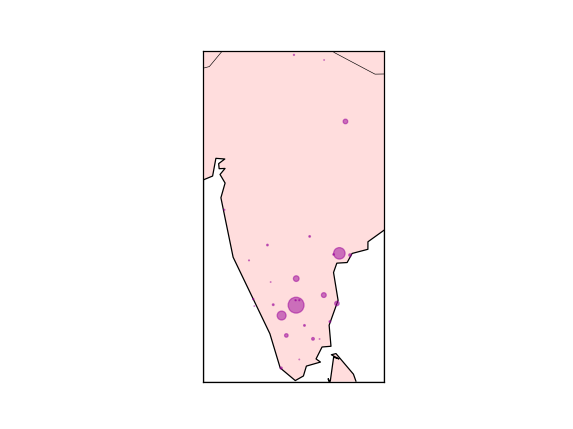

/home/rohith/installations/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/rohith/installations/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


[]

In [15]:
%matplotlib notebook

m = Basemap(projection='mill',  # Miller projection 
            resolution='c',     # Crude resolution
            llcrnrlat = 8,      # Lower left corner latitude
            llcrnrlon = 65,     # Lower left corner longitude
            urcrnrlat = 40,     # Upper right corner latitude  
            urcrnrlon = 100     # Upper right corner longitude 
           ) 

m.drawcountries()

m.drawmapboundary(color='#000000')
m.fillcontinents(color = '#FFDDDD', lake_color = '#FFFFFF')
m.drawcoastlines()

x,y = m(lons, lats)

m.scatter(x,y,marker = 'o', c = '#990099', alpha = 0.5, zorder = 5, s = sizes)


plt.plot()

## Recommend workshops by location:

In [9]:
def recommend(city, n):
    if city in location_counts.index:
        for workshop in wksp_pmf.loc[city].sort_values(ascending = False).head(n).index:
            print(workshop)
            
    else:
        for i in (locations.T
                  .loc['Ticket name']
                  .value_counts()
                  .drop(['General Registration', 'Pravega Accommodation for 2 nights'])
                  .head(n)
                  .index):
            print(i)
            


In [12]:
recommend('Salem', 3)

Game Development using Virtual Reality
Touch and Augmented Reality
Theatre Improv


In [11]:
recommend('Vijayawada', 3)

Internet of Things
Big Data
Quadcopter Workshop
